In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv(r"C:\Users\86151\Downloads\digit recognizer\train.csv")
x = data.iloc[:,1:]
y = data.iloc[:,0]
x.shape

(42000, 784)

[]

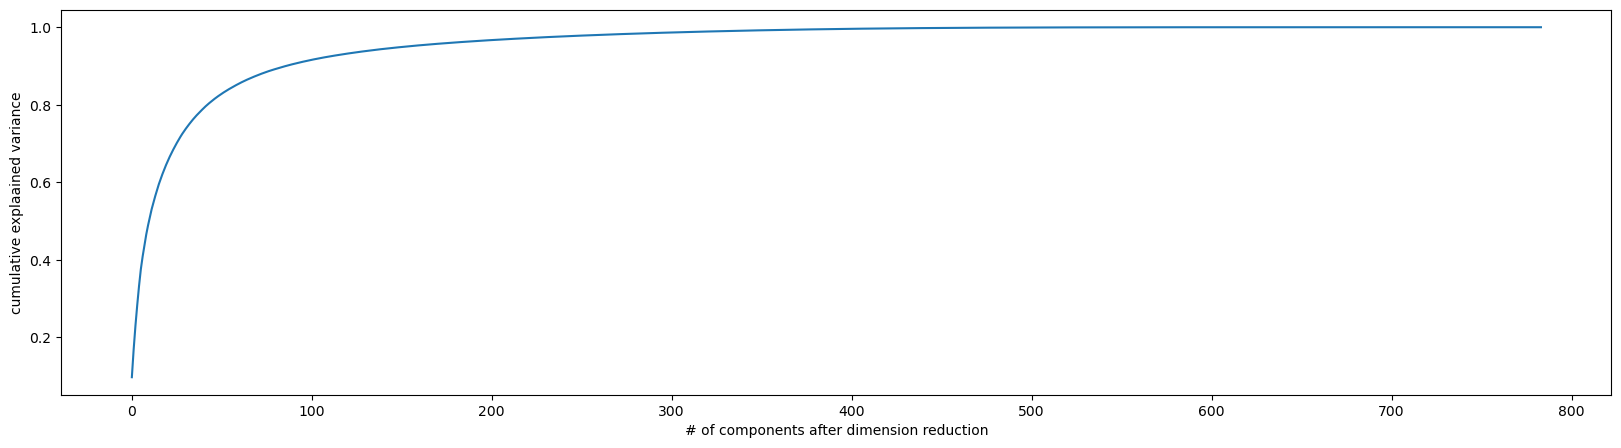

In [3]:
pca_line = PCA().fit(x)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel('# of components after dimension reduction')
plt.ylabel('cumulative explaained variance')
plt.plot()

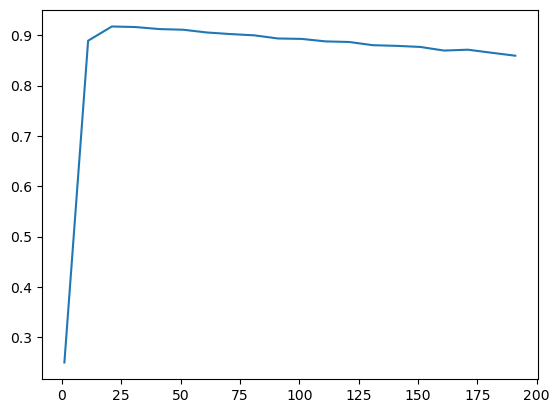

In [5]:
score = []
for i in range(1,201,10):
    x_dr = PCA(i).fit_transform(x)
    sc = cross_val_score(RFC(n_estimators=10,random_state=0),x_dr,y,cv=5).mean()
    score.append(sc)
plt.plot(range(1,201,10),score)
plt.show()

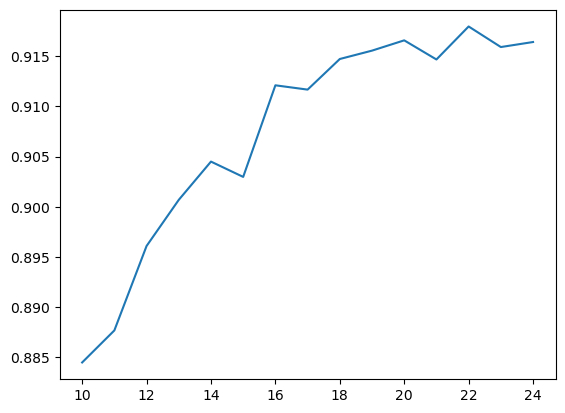

In [6]:
score = []
for i in range(10,25):
    x_dr = PCA(i).fit_transform(x)
    sc = cross_val_score(RFC(n_estimators=10,random_state=0),x_dr,y,cv=5).mean()
    score.append(sc)
plt.plot(range(10,25),score)
plt.show()

In [7]:
x_dr0 = PCA(22).fit_transform(x)
cross_val_score(RFC(n_estimators=10,random_state=0),x_dr0,y,cv=5).mean()

0.917

In [8]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_dr0,y,cv=5).mean()

0.9460714285714286

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),x_dr0,y,cv=5).mean()

0.9687142857142857

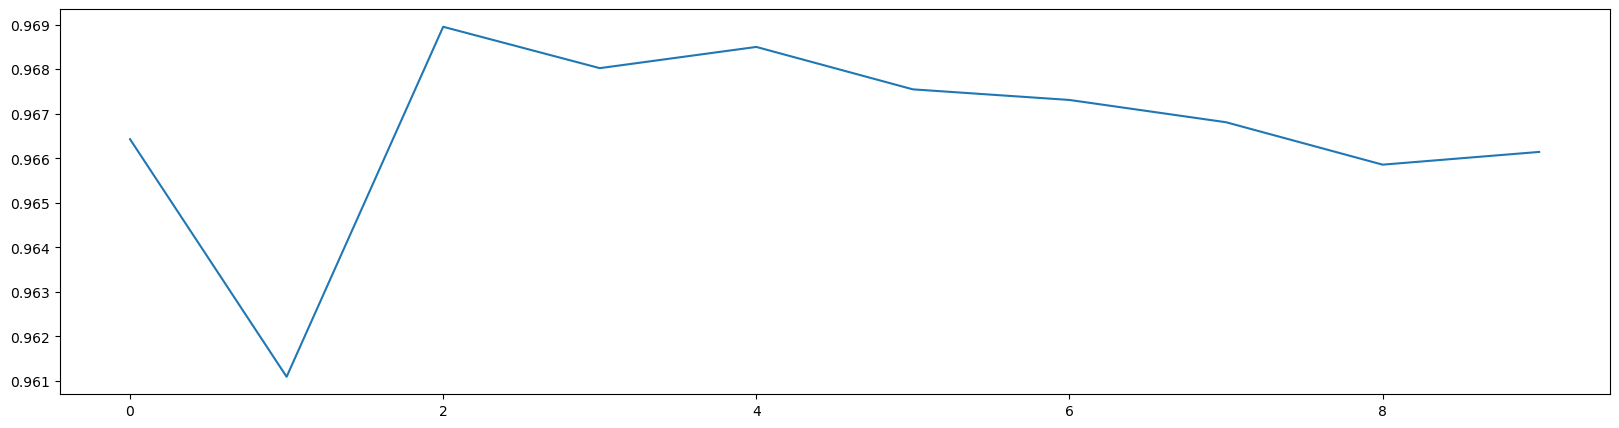

In [11]:
score = []
x_dr = PCA(22).fit_transform(x)
for i in range(10):
    sc = cross_val_score(KNN(i+1),x_dr,y,cv=5).mean()
    score.append(sc)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [12]:
cross_val_score(KNN(3),x_dr0,y,cv=5).mean()

0.969095238095238

In [13]:
%%timeit
cross_val_score(KNN(3),x_dr0,y,cv=5).mean()

2.01 s ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
